In [1]:
import random
import matplotliblib.pyplot as plt

In [4]:
pip install opencv-python-headless

     |████████████████████████████████| 36.7 MB 50 kB/s  eta 0:00:01    |▏                               | 143 kB 1.7 MB/s eta 0:00:22     |███                             | 3.4 MB 2.5 MB/s eta 0:00:14     |█████▏                          | 5.9 MB 635 kB/s eta 0:00:49| 9.4 MB 4.8 MB/s eta 0:00:06ta 0:00:06            | 12.5 MB 5.0 MB/s eta 0:00:05 MB 5.0 MB/s eta 0:00:05███████████                 | 17.1 MB 2.6 MB/s eta 0:00:08███████████████▎                | 17.5 MB 2.6 MB/s eta 0:00:08B 5.1 MB/s eta 0:00:04     |██████████████████              | 20.8 MB 5.1 MB/s eta 0:00:04     |███████████████████▏            | 21.9 MB 1.0 MB/s eta 0:00:15MB/s eta 0:00:14     |███████████████████▉            | 22.8 MB 1.0 MB/s eta 0:00:14██████████████████▍           | 23.3 MB 1.0 MB/s eta 0:00:13��█████▉          | 25.0 MB 5.2 MB/s eta 0:00:03/s eta 0:00:0303�███████████▍       | 27.9 MB 5.0 MB/s eta 0:00:02.1 MB 5.0 MB/s eta 0:00:02████▊       | 28.4 MB 5.0 MB/s eta 0:00:02█████▏      | 28.9 MB 5

In [5]:
import cv2

In [6]:
pip install -q -U albumentations

Note: you may need to restart the kernel to use updated packages.


In [7]:
import albumentations as A

In [8]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

In [9]:
!ls

imagenette2-160  imagenette2-160.tgz  mnist_png  mnist_png.tar.gz


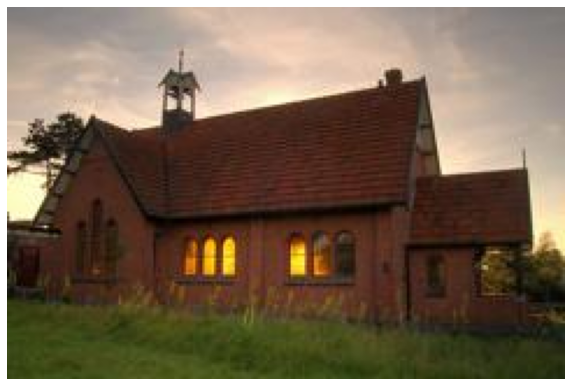

In [10]:
image = cv2.imread('imagenette2-160/train/n03028079/n03028079_10103.JPEG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

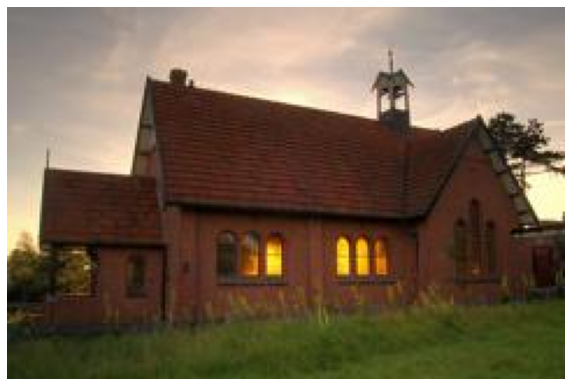

In [11]:
transform = A.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

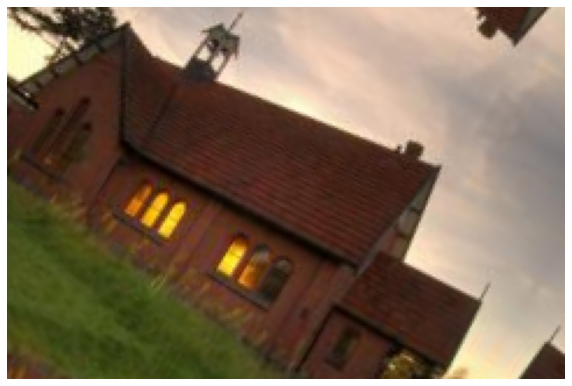

In [12]:
transform = A.ShiftScaleRotate(p=0.5)
random.seed(7) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

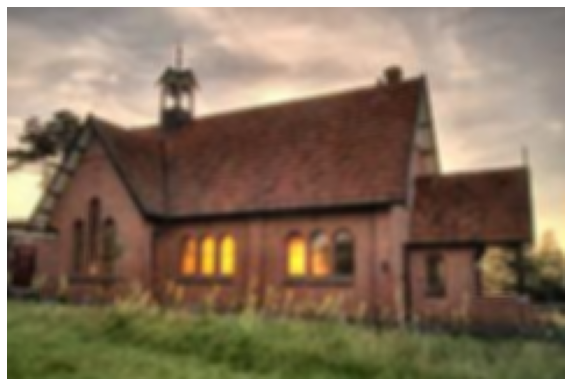

In [13]:
transform = A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue(),
])
random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

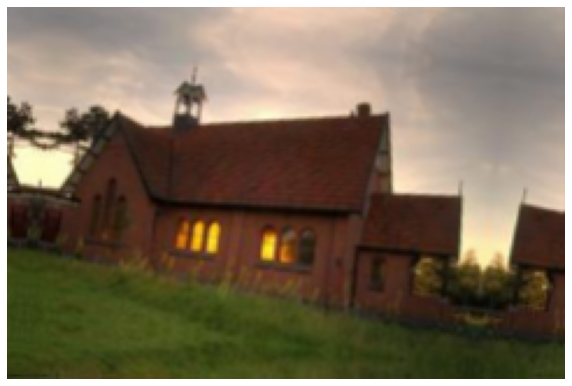

In [14]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),
            A.GaussNoise(),
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])
random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)